In [ ]:
#TRENDS:

1) # The data shows a correlation city Latitude and temperature, which seems to follow a parabolic curve. The curve appears to peak after the equator
2) # City Latitude with respect to humidity and cloudiness shows no correlation (data spread appears random)
3) # There is little correlation (if any) between city latitude and wind speed, although the data suggests that most cities have wind speeds less than 20 mph


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
%matplotlib notebook

# Analyse Date
from datetime import datetime
#Date_of_Analysis = datetime.now()strftime('%Y-%m-%d')

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#call url via API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#set up empty lists
cityweatherdata =[]

#Print to logger and create counters
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1

#loop through cities and make an API call
for i, city in enumerate(cities):
    cityurl = url + "&q=" + city
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    #set up API call, convert to json files and handle errors if they occur
    try:
        weather = requests.get(cityurl).json()
        
         # Parse out the max temp, humidity, and cloudiness
        city_lat = weather["coord"]["lat"]
        city_lng = weather["coord"]["lon"]
        city_max_temp = weather["main"]["temp_max"]
        city_humidity = weather["main"]["humidity"]
        city_clouds = weather["clouds"]["all"]
        city_wind = weather["wind"]["speed"]
        city_country = weather["sys"]["country"]
        city_date = weather["dt"]

        # Append the City information into city_data list
        cityweatherdata.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except: 
        print("city not found")
        pass

#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | mabaruma
Processing Record 6 of Set 1 | cap-aux-meules
Processing Record 7 of Set 1 | pitimbu
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | paso de los toros
Processing Record 10 of Set 1 | the valley
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | tumannyy
city not found
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | san ramon de la nueva oran
Processing Record 15 of Set 1 | egvekinot
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | illoqqortoormiut
city not found
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | xaxim
Processing Record 20 of Set 1 | sterling
Processing Record 21 of Set 1 | ushuai

Processing Record 43 of Set 4 | aybak
city not found
Processing Record 44 of Set 4 | paita
Processing Record 45 of Set 4 | camalu
Processing Record 46 of Set 4 | palana
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | vaitape
Processing Record 49 of Set 4 | san quintin
Processing Record 0 of Set 5 | muzaffarabad
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | baishishan
Processing Record 3 of Set 5 | erdenet
Processing Record 4 of Set 5 | churapcha
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | makinsk
Processing Record 8 of Set 5 | rafaela
Processing Record 9 of Set 5 | moroyama
Processing Record 10 of Set 5 | gat
Processing Record 11 of Set 5 | ilheus
Processing Record 12 of Set 5 | ostersund
Processing Record 13 of Set 5 | cockburn town
Processing Record 14 of Set 5 | alta floresta
Processing Record 15 of Set 5 | quebrada larga
Processing Record 16 of Set 5 | assini

Processing Record 37 of Set 8 | ewa beach
Processing Record 38 of Set 8 | west plains
Processing Record 39 of Set 8 | oskarshamn
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | attawapiskat
city not found
Processing Record 43 of Set 8 | charyshskoye
Processing Record 44 of Set 8 | umm jarr
city not found
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | manzanillo
Processing Record 47 of Set 8 | cairns
Processing Record 48 of Set 8 | decatur
Processing Record 49 of Set 8 | makat
Processing Record 0 of Set 9 | aswan
Processing Record 1 of Set 9 | leningradskiy
Processing Record 2 of Set 9 | gdansk
Processing Record 3 of Set 9 | manati
Processing Record 4 of Set 9 | vangaindrano
Processing Record 5 of Set 9 | cortez
Processing Record 6 of Set 9 | borgarnes
Processing Record 7 of Set 9 | galesong
Processing Record 8 of Set 9 | jining
Processing Record 9 of Set 9 | college
Processing Record 10 of Set 9 

Processing Record 27 of Set 12 | betulia
Processing Record 28 of Set 12 | sault sainte marie
Processing Record 29 of Set 12 | amol
Processing Record 30 of Set 12 | ahuimanu
Processing Record 31 of Set 12 | sungaipenuh
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | nabire
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | jiayuguan
Processing Record 36 of Set 12 | eyl
Processing Record 37 of Set 12 | bonavista
Processing Record 38 of Set 12 | roma
Processing Record 39 of Set 12 | karkaralinsk
city not found
Processing Record 40 of Set 12 | buritis
Processing Record 41 of Set 12 | wageningen
Processing Record 42 of Set 12 | felanitx
Processing Record 43 of Set 12 | uribia
Processing Record 44 of Set 12 | gazojak
Processing Record 45 of Set 12 | ararat
Processing Record 46 of Set 12 | thunder bay
Processing Record 47 of Set 12 | kaliua
Processing Record 48 of Set 12 | zyryanka
Processing Record 49 of Set 12 | libertador general san martin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(cityweatherdata)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv("city_weather.csv")

# Show Record Count
print(city_data_pd.count())
#print("Hello")

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64


#### LATITUDE VS TEMP

<IPython.core.display.Javascript object>


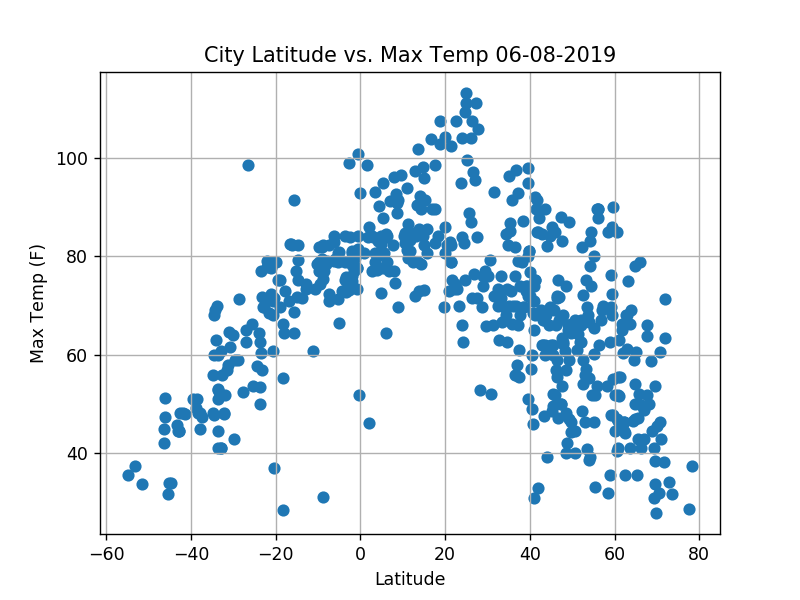

In [26]:
plt.figure()
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temp 06-08-2019")
plt.grid()

plt.savefig("Lat_vs_MaxTemp.png")


#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


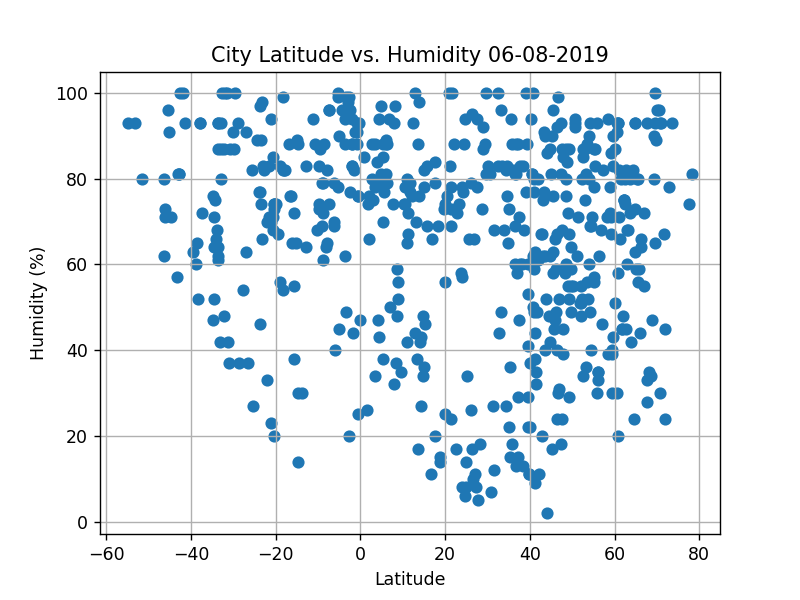

In [27]:
plt.figure()
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity 06-08-2019")
plt.grid()

plt.savefig("Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


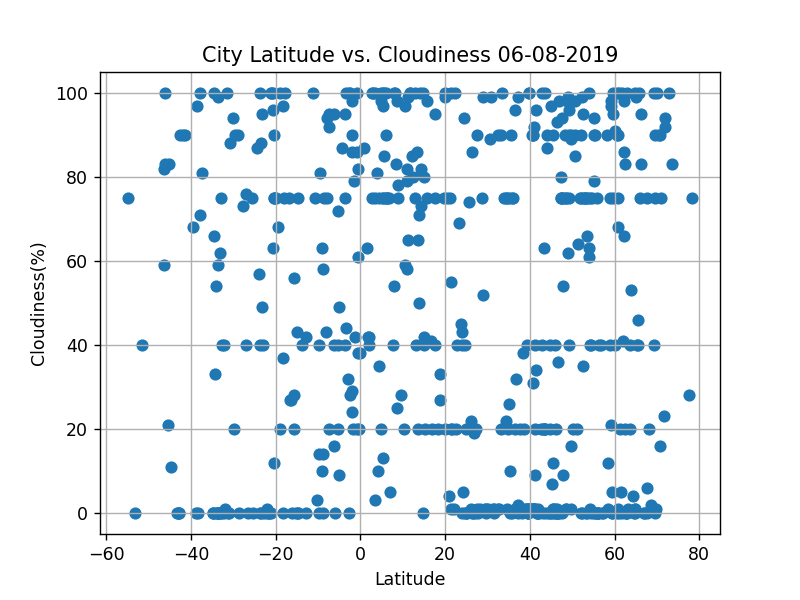

In [28]:
plt.figure()
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness 06-08-2019")
plt.grid()

plt.savefig("Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


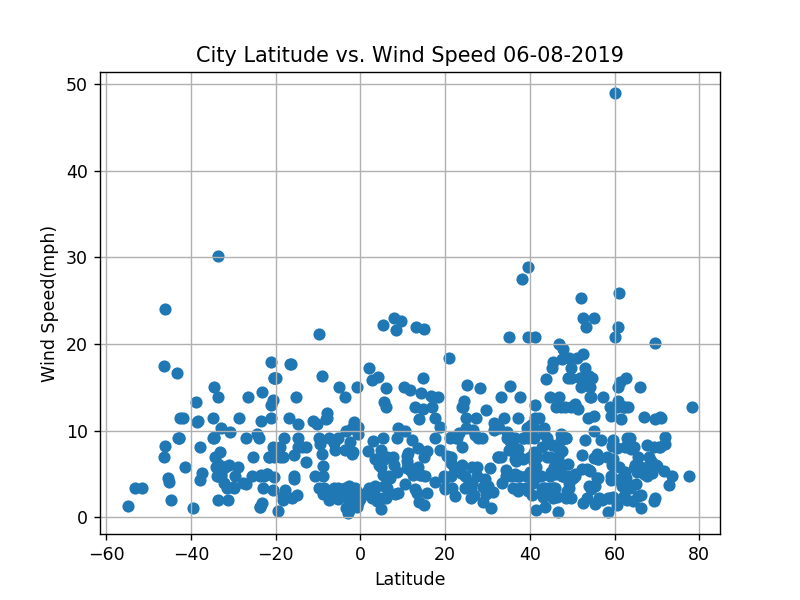

In [29]:
plt.figure()
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed 06-08-2019")
plt.grid()

plt.savefig("Lat_vs_Wind Speed.png")